<a href="https://colab.research.google.com/github/Vijay06111998/Customer_Behavior_Modeling/blob/main/Customer_Behaviour3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [59]:
# Load the dataset
file_path = "/content/Customer_Behavior_Data.csv"
customer_data = pd.read_csv(file_path, sep=';')


In [60]:
customer_data

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [61]:
# Show basic information and overview of the data
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [62]:
print(customer_data.describe())

       account length  location code       user id  add to wishlist  \
count     3333.000000    3333.000000  3.333000e+03      3333.000000   
mean       101.064806     437.182418  3.746291e+06         8.099010   
std         39.822106      42.371290  2.746626e+05        13.688365   
min          1.000000     408.000000  3.271058e+06         0.000000   
25%         74.000000     408.000000  3.508680e+06         0.000000   
50%        101.000000     415.000000  3.748187e+06         0.000000   
75%        127.000000     510.000000  3.985970e+06        20.000000   
max        243.000000     510.000000  4.229964e+06        51.000000   

       desktop sessions  app sessions  desktop transactions  \
count       3333.000000   3333.000000           3333.000000   
mean         179.811881     30.567957             17.087609   
std           54.457135      9.269376              4.323795   
min            0.000000      0.000000              0.000000   
25%          144.000000     24.000000        

In [63]:
print(customer_data.head())

   account length  location code  user id credit card info save push status  \
0             128            415  3824657                    no         yes   
1             107            415  3717191                    no         yes   
2             137            415  3581921                    no          no   
3              84            408  3759999                   yes          no   
4              75            415  3306626                   yes          no   

   add to wishlist  desktop sessions  app sessions  desktop transactions  \
0               25               265            45                    17   
1               26               162            27                    17   
2                0               243            41                    10   
3                0               299            51                     5   
4                0               167            28                    13   

   total product detail views  session duration  promotion clicks  \

In [89]:
numerical_cols = customer_data.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
customer_data[numerical_cols] = imputer.fit_transform(customer_data[numerical_cols])

In [90]:
# Handle missing values
customer_data = customer_data.dropna()  # Drop rows with missing values

In [91]:
print(customer_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   float64
 1   location code                        3333 non-null   float64
 2   user id                              3333 non-null   float64
 3   credit card info save                3333 non-null   float64
 4   push status                          3333 non-null   float64
 5   add to wishlist                      3333 non-null   float64
 6   desktop sessions                     3333 non-null   float64
 7   app sessions                         3333 non-null   float64
 8   desktop transactions                 3333 non-null   float64
 9   total product detail views           3333 non-null   float64
 10  session duration                     3333 non-null   float64
 11  promotion clicks              

In [92]:
# Convert categorical variables to numeric
le = LabelEncoder()
categorical_cols = ['credit card info save', 'push status'] # List the categorical features
for col in categorical_cols:
    customer_data[col] = le.fit_transform(customer_data[col])

customer_data['churn'] = le.fit_transform(customer_data['churn'])



In [93]:
# Convert 'avg order value' and other columns to numeric, handle errors
for col in customer_data.select_dtypes(include=['object']).columns:
    customer_data[col] = pd.to_numeric(customer_data[col].str.replace(',', '.'), errors='coerce')
    # Impute missing values after conversion (NaNs from errors)
    customer_data[col] = imputer.fit_transform(customer_data[[col]])  # Impute missing values again


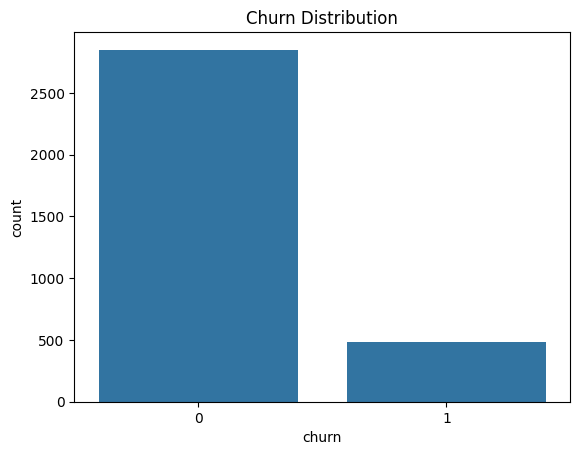

In [94]:
# Visualize churn distribution
sns.countplot(x='churn', data=customer_data)
plt.title('Churn Distribution')
plt.show()

The count plot displays the distribution of the "churn" variable in the dataset.  The x-axis represents the churn categories (0 and 1), and the y-axis represents the count of customers in each category.
0  Indicates customers who *did not* churn (i.e., they remained as customers). 1: Indicates customers who *did* churn (i.e., they cancelled their service or stopped being a customer).



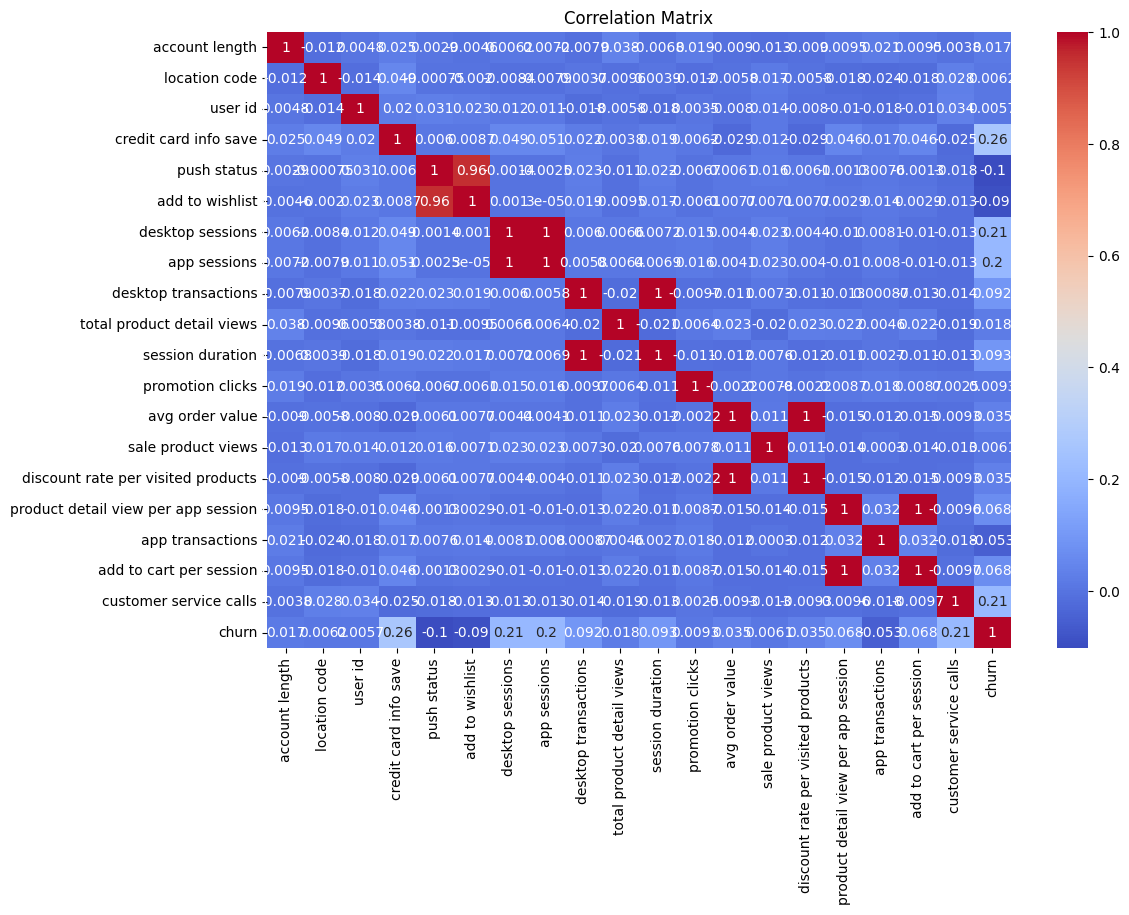

In [79]:
# Correlation matrix to understand relationships
plt.figure(figsize=(12, 8))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap visualizes the correlation matrix of the customer dataset. Each square shows the correlation coefficient between two variables; lighter colors indicate stronger positive correlations, darker colors indicate stronger negative correlations, and values near zero suggest weak or no linear relationship.  This helps identify which customer attributes are most strongly related to each other, including their relationship with customer churn.


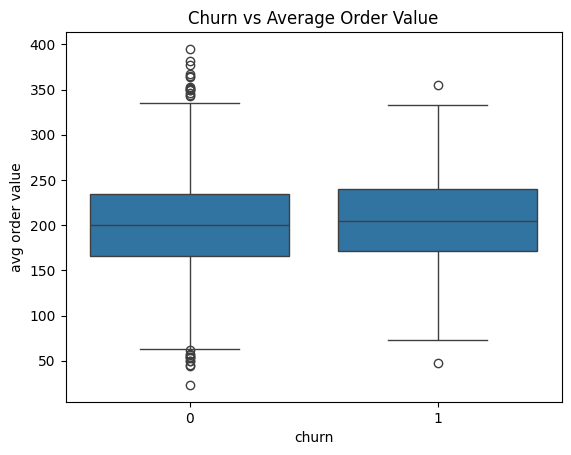

In [76]:
# Boxplot: Churn vs Average Order Value
sns.boxplot(x='churn', y='avg order value', data=customer_data)
plt.title('Churn vs Average Order Value')
plt.show()

The box plot shows the distribution of average order values for customers who churned (churn = 1) versus those who didn't (churn = 0).  It helps visualize if there's a difference in spending habits between the two groups.


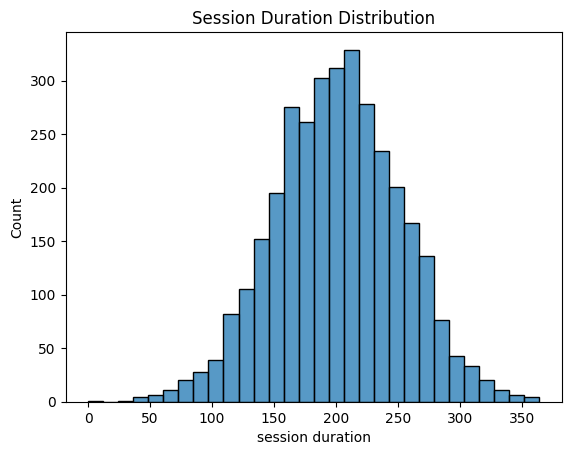

In [77]:
# Distribution of session duration
sns.histplot(customer_data['session duration'], bins=30)
plt.title('Session Duration Distribution')
plt.show()

The `histplot` visualizes the distribution of customer session durations.  The x-axis represents the session duration (likely in seconds or minutes), and the y-axis shows the frequency or count of customers with sessions of that duration.  The plot allows you to see the typical session length, the variability in session lengths, and whether the data is skewed (e.g., are most sessions short, or is there a long tail of very long sessions?).  The `bins=30` argument divides the range of session durations into 30 intervals for the histogram.


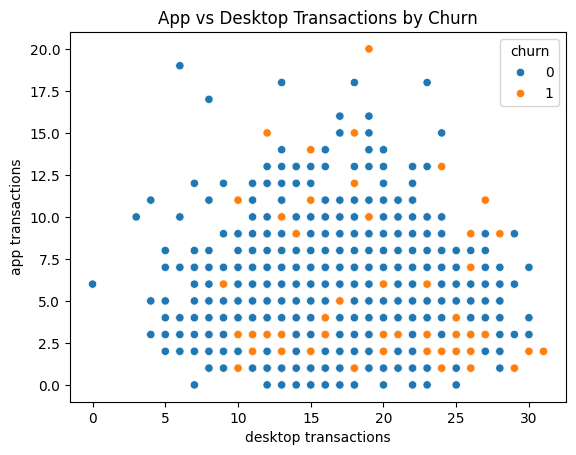

In [78]:
# Scatter plot of app transactions vs desktop transactions
sns.scatterplot(x='desktop transactions', y='app transactions', hue='churn', data=customer_data)
plt.title('App vs Desktop Transactions by Churn')
plt.show()


The scatter plot "App vs Desktop Transactions by Churn" visualizes the relationship between the number of transactions made on desktop and mobile app platforms, colored by customer churn status.  It helps to understand if there's a pattern in transaction behavior between churned and non-churned customers.  For example, it might reveal if churned customers tend to use one platform more than the other, or if a specific combination of app and desktop transactions is correlated with churn.


In [95]:
# Feature Engineering (example: total transactions)
customer_data['total_transactions'] = customer_data['desktop transactions'] + customer_data['app transactions']

In [96]:
# Feature scaling (important for some algorithms)
scaler = StandardScaler()
numerical_features = ['avg order value', 'session duration', 'total_transactions', 'desktop transactions', 'app transactions'] #add relevant numerical features
customer_data[numerical_features] = scaler.fit_transform(customer_data[numerical_features])

NameError: name 'StandardScaler' is not defined

In [103]:
# Define features and target
X = customer_data.drop('churn', axis=1)
y = customer_data['churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[811  46]
 [ 42 101]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.69      0.71      0.70       143

    accuracy                           0.91      1000
   macro avg       0.82      0.83      0.82      1000
weighted avg       0.91      0.91      0.91      1000



True Negatives (TN): 811 (correctly predicted non-churn)
 False Positives (FP): 46 (incorrectly predicted churn)
 False Negatives (FN): 42 (incorrectly predicted non-churn)
True Positives (TP): 101 (correctly predicted churn)

 The model has a reasonable accuracy (91%). Its was predicting non-churn (precision and recall near 0.95). However, it struggles a bit with identifying actual churn cases (precision and recall around 0.7).  The model has a decent overall F1-score. Depending on the business context, a higher recall might be prioritized (reducing false negatives, meaning fewer missed churn cases) even if it means slightly lower precision.


In [104]:
# RandomForestClassifier a
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_  # Get the best model found by GridSearchCV

# Predict and evaluate
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[855   2]
 [ 49  94]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       857
           1       0.98      0.66      0.79       143

    accuracy                           0.95      1000
   macro avg       0.96      0.83      0.88      1000
weighted avg       0.95      0.95      0.94      1000



The model has high accuracy (95%).  However, the recall for class 1 (churn) is moderate (66%).  This means the model misses a significant number of actual churn cases. While it's good at correctly identifying non-churned customers, improving the recall for churned customers may be important depending on the business goal.  For example, if preventing customer churn is a high priority, then further optimization of the model to improve recall is necessary.